<div style ="font-family:Trebuchet MS; background-color : #f8f0fa; border-left: 5px solid #1b4332; padding: 12px; border-radius: 50px 50px;">
    <h2 style="color: #1b4332; font-size: 48px; text-align: center;">
        <b>Step 3 in Feature Engineering: Handling Outliers</b>
        <hr style="border-top: 2px solid #264653;">
    </h2>
    <h3 style="font-size: 14px; color: #264653; text-align: left; "><strong> I hope this is very helpful. let's started </strong></h3>
</div>

Outliers are data points that deviate significantly from the rest of the dataset. They can distort statistical analyses and models, making it important to handle them properly. Below, we'll walk through different methods for identifying and handling outliers in the Titanic dataset.


- we will practice along with the [titanic dataset](https://www.kaggle.com/datasets/brendan45774/test-file/data)
<hr>

# 1. Identifying Outliers

There are several techniques to identify outliers:

- **Z-Score Method:** This method measures how many standard deviations a data point is from the mean. Typically, a Z-score above 3 or below -3 is considered an outlier.

- **Interquartile Range (IQR) Method:** IQR is the range between the 25th percentile (Q1) and 75th percentile (Q3). Outliers are often defined as points that lie below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

- **Visualization:** Visual tools like box plots and scatter plots can help quickly identify outliers.

In [22]:
## load the titanic dataset 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('..\Data\Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [18]:
# extract the numerical columns to detect the outliers

df_num = df.select_dtypes(include=['int64', 'float64']).drop(columns=['PassengerId'])
df_num.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## 1. z-sore method

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 0, 'SibSp': 11, 'Parch': 9, 'Fare': 11}
['SibSp', 'Parch', 'Fare']


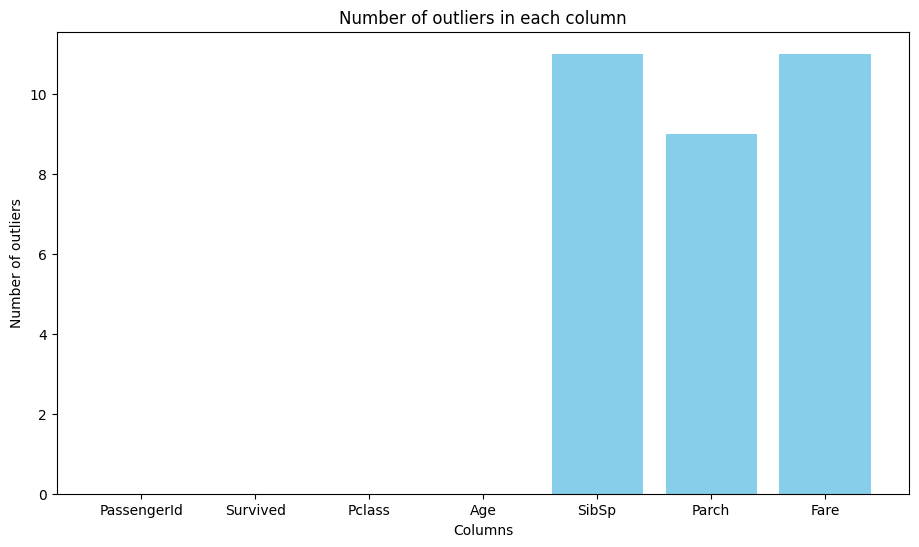

In [34]:
# detecting outliers using z-score and calculate the number of outliers in each column

def detect_outliers_zscore(data, threshold=3):
    outliers = {}
    columns_outliers = []
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        z_scores = np.abs((data[col] - data[col].mean()) / data[col].std()) # this is a list of z-scores for each value in the column 
        outliers[col] = len(z_scores[z_scores > threshold]) # count of outliers in the column
        if len(z_scores[z_scores > threshold]) > 0:
            columns_outliers.append(col)
    return outliers, columns_outliers

outliers, columns_outliers = detect_outliers_zscore(df)
print(outliers)
print(columns_outliers)
#plot them in a bar chart

plt.figure(figsize=(11, 6))
plt.bar(outliers.keys(), outliers.values(),color='skyblue')
plt.ylabel('Number of outliers')
plt.xlabel('Columns')
plt.title('Number of outliers in each column')
plt.show()


## 2. IQR method

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Age': 1, 'SibSp': 11, 'Parch': 94, 'Fare': 51}
['Age', 'SibSp', 'Parch', 'Fare']


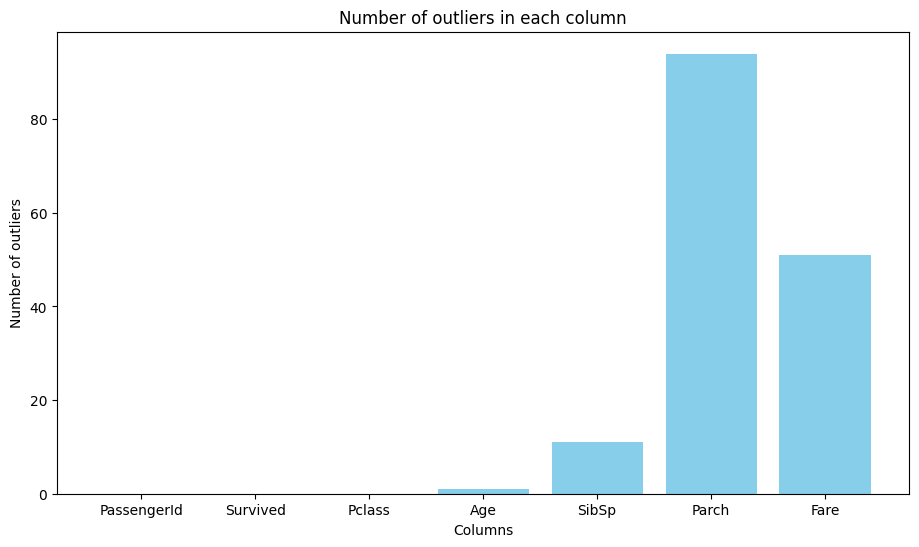

In [35]:
# idnetify outliers using IQR method and calculate the number of outliers in each column

outliers = {}
columns_outliers = []
def detect_outliers_iqr(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        outliers[col] = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
        if len(df[(df[col] < lower_bound) | (df[col] > upper_bound)]) > 0:
            columns_outliers.append(col)
    return outliers, columns_outliers

outliers, columns_outliers = detect_outliers_iqr(df)
print(outliers)
print(columns_outliers)
#plot them in a bar chart

plt.figure(figsize=(11, 6))
plt.bar(outliers.keys(), outliers.values(),color='skyblue')
plt.ylabel('Number of outliers')
plt.xlabel('Columns')
plt.title('Number of outliers in each column')
plt.show()


## 3. Box plot visualization

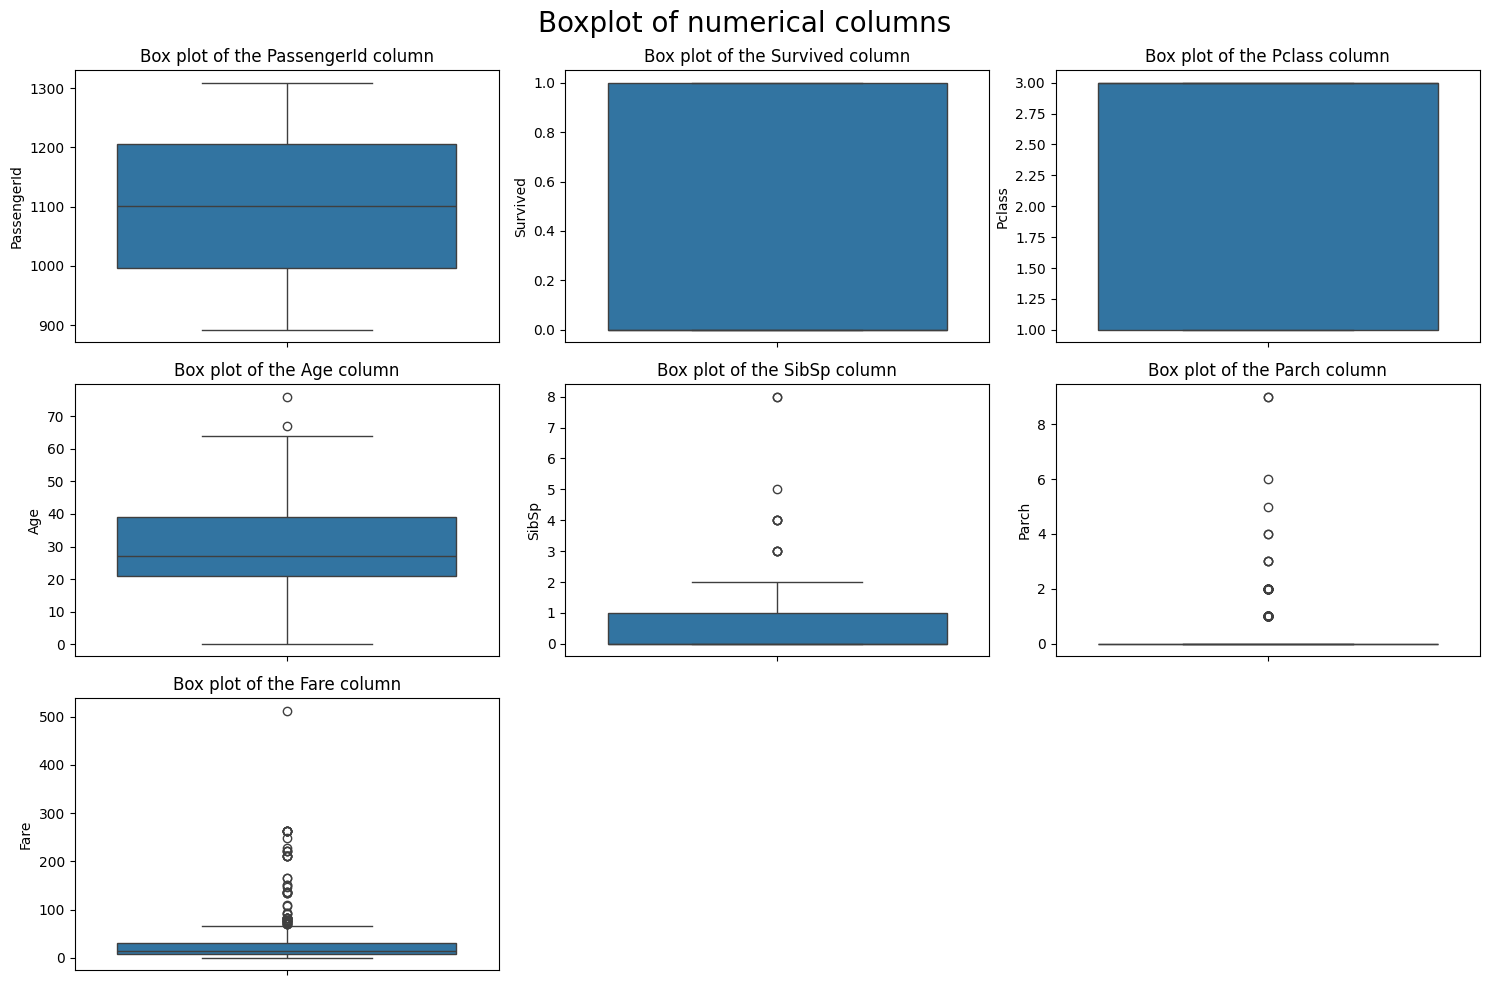

In [30]:
# visualize outliers using boxplot

def visualize_outliers(df):
    plt.figure(figsize=(15, 10))
    columns = df.select_dtypes(include=['int64', 'float64']).columns
    for i, col in enumerate(columns):
        plt.subplot((len(columns)) // 3 + 1, 3, i+1)
        plt.suptitle('Boxplot of numerical columns', fontsize=20)
        sns.boxplot(df[col])
        plt.title(f"Box plot of the {col} column")
    plt.tight_layout()
    plt.show()

visualize_outliers(df)


we can use z-score when the data is normally distributed and IQR when the data is not normally distributed. because IQR is based on the quartiles of the data and is not affected by the mean and standard deviation of the data.

# 2. Handling Outliers

Once you've identified outliers, there are several strategies for handling them:

## A. Capping or Flooring Outliers

Capping involves setting a limit on the maximum value of a data point, while flooring sets a limit on the minimum value. This technique is particularly useful when you don’t want to remove data points but want to minimize their impact.

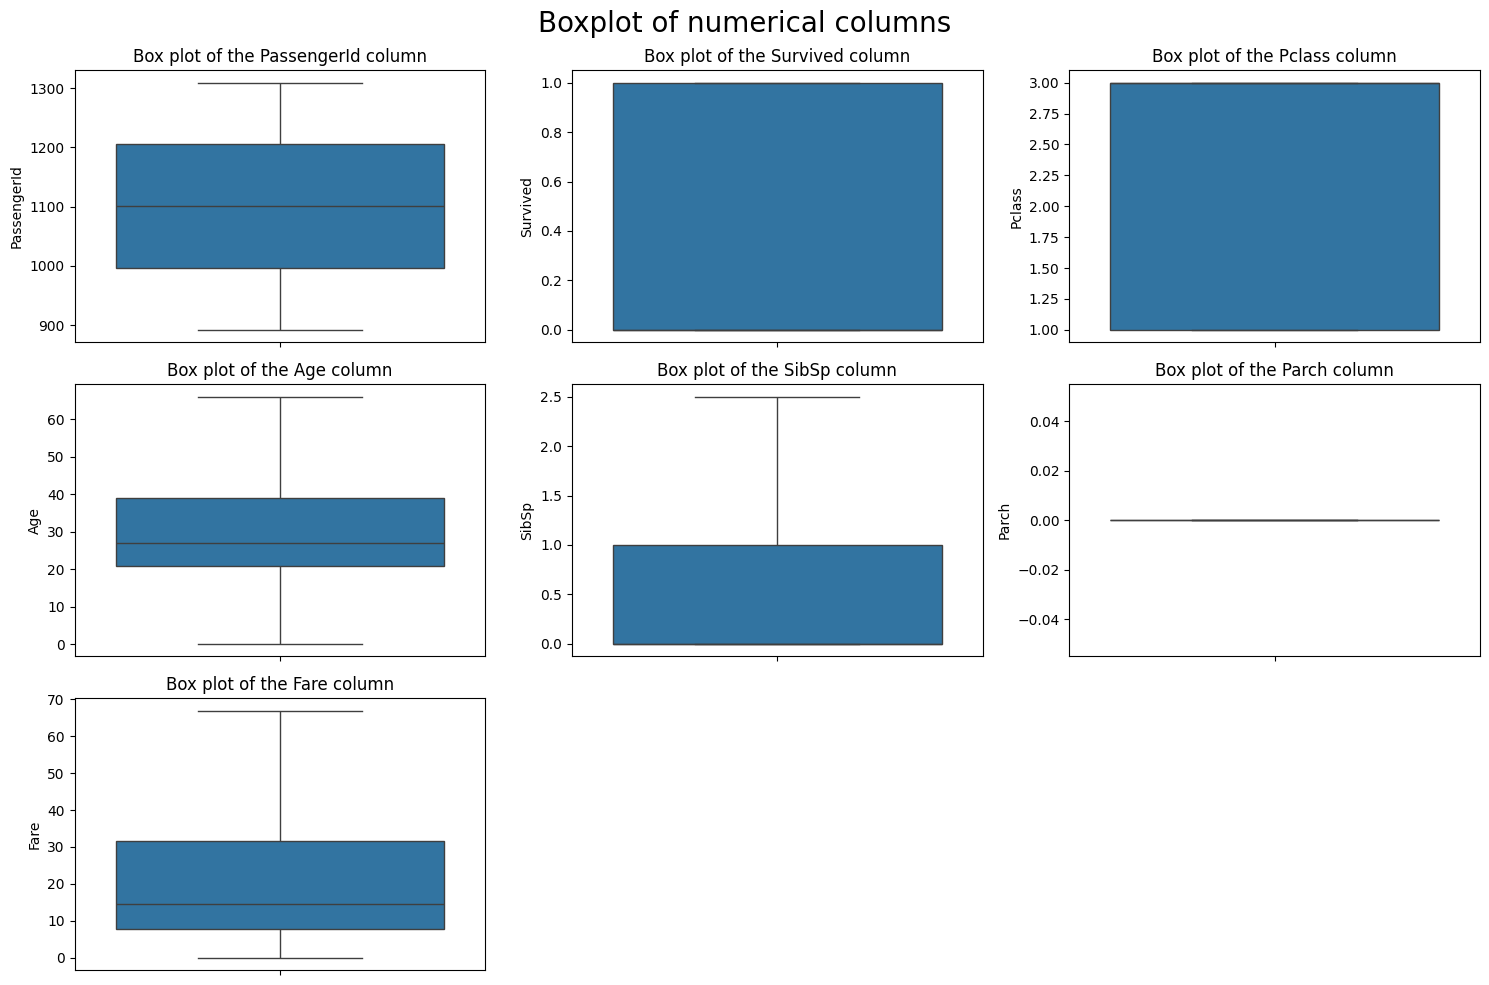

In [32]:
# capping or flooring the outliers using IQR method

def cap_outliers_iqr(df):
    columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col]) # this will replace the values below the lower bound with the lower bound
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col]) # this will replace the values above the upper bound with the upper bound
    return df

df = cap_outliers_iqr(df)
visualize_outliers(df)

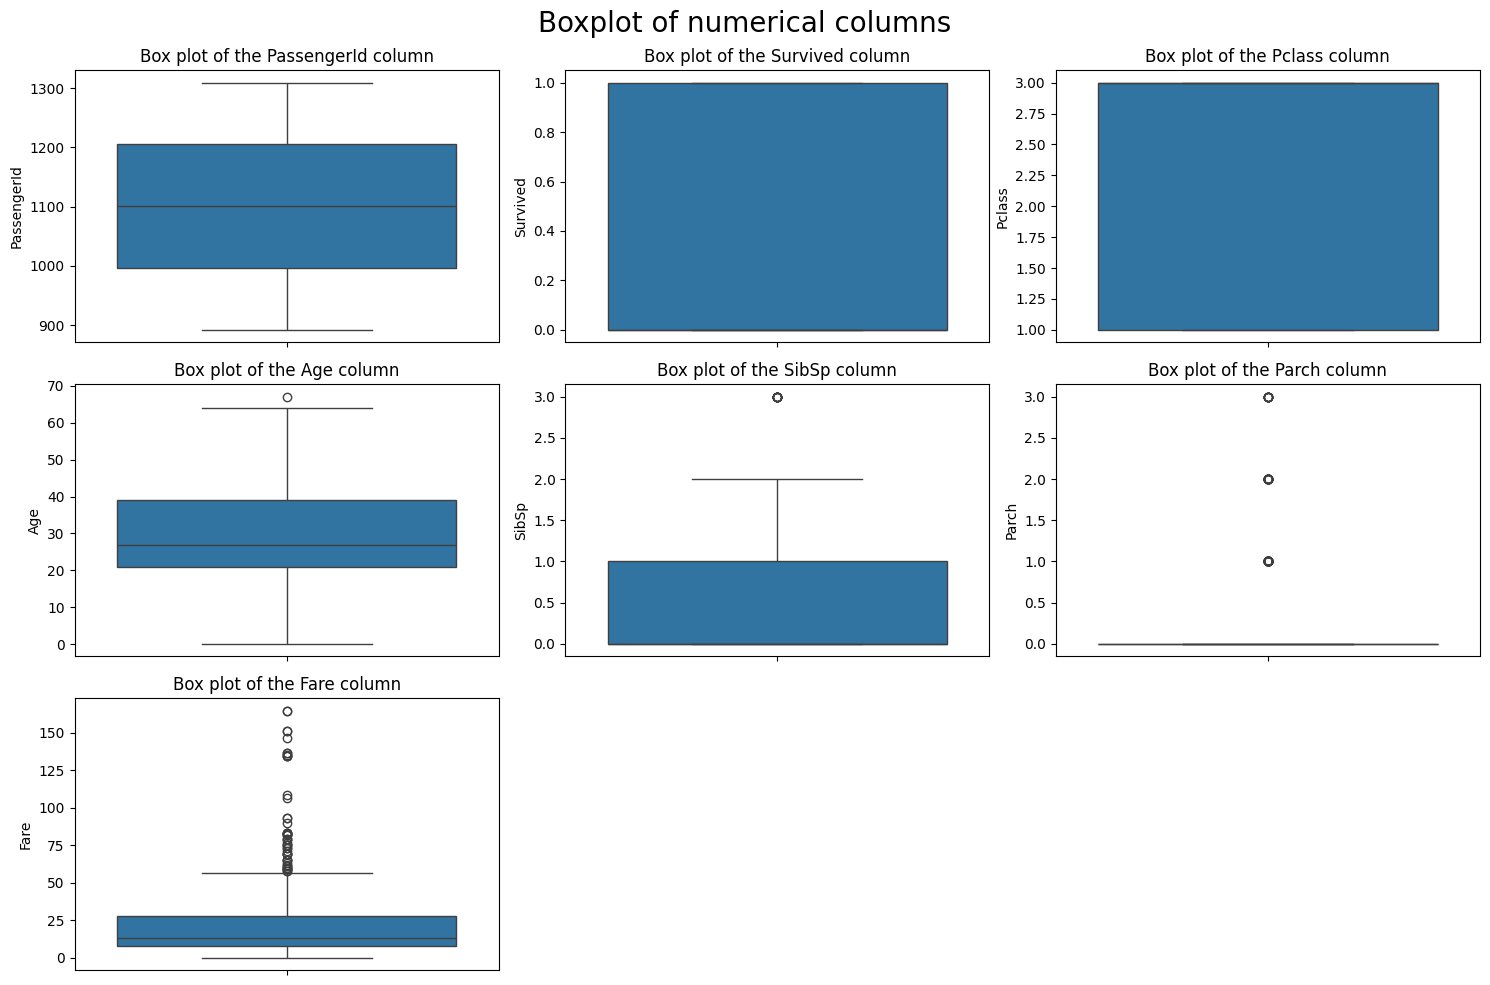

In [33]:
## capping or flooring the outliers using z-score method
df = pd.read_csv('..\Data\Titanic.csv')
def cap_outliers_zscore(df, threshold=3):
    columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df[col] = np.where(z_scores > threshold, np.sign(df[col]) * threshold, df[col]) # this will replace the values above the threshold with the threshold
    return df

df = cap_outliers_zscore(df)
visualize_outliers(df)

## B. Transforming Outliers

Transformations can reduce the effect of outliers without removing them. Common transformations include log, square root, and Box-Cox.

In [37]:
# log transformation

df = pd.read_csv('..\Data\Titanic.csv')

# apply log transformation to the columns that have outliers 

def log_transform(df, columns_outliers):
    for col in columns_outliers:
        df[col] = np.log1p(df[col])
    return df

df = log_transform(df, columns_outliers)


## C. Removing outliers

In [39]:
# remove the outliers using IQR method

df = pd.read_csv('..\Data\Titanic.csv')
def remove_outliers(df):
    columns = df.select_dtypes(include=['int64', 'float64']).columns
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

df = remove_outliers(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


this method is not recommended because it will remove a lot of data points and may affect the model performance, you can use it there is no other way to handle the outliers or if there is a small number of outliers.